In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss


# Введение

In [3]:
file_path = "data (2).xlsx"
read_df = pd.read_excel(file_path)
df = read_df[1:].T[4:60].rename(columns = {1:"Year" ,2:"USA", 3:"France"}).reset_index(drop=True)
for col in df:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.tail()

,Year,USA,France
51,2011.0,18.984846,79.511660
52,2012.0,18.757920,75.962780
53,2013.0,19.173831,74.704486
54,2014.0,19.230239,78.235588
55,2015.0,19.323778,77.627801


# Исходные данные

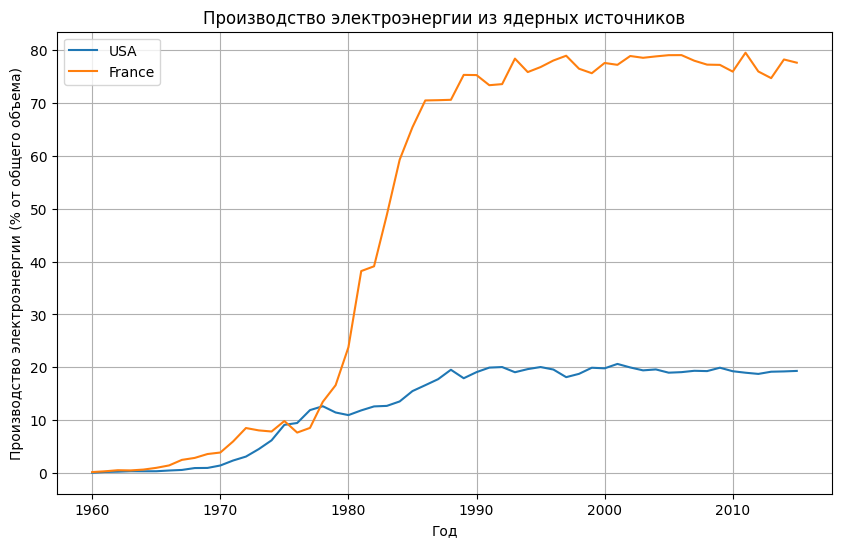

Динамика производства электроэнергии из ядерных источников:
Соединенные Штаты Америки: 27793.18%
Франция: 39808.67%
Темп прироста производства электроэнергии из ядерных источников:
Соединенные Штаты Америки: 0.1058
Франция: 0.1129


In [4]:
# Построение графиков временных рядов для выбранных стран
plt.figure(figsize=(10, 6))

plt.plot(df["Year"], df["USA"], label="USA")
plt.plot(df["Year"], df["France"], label="France")

plt.title("Производство электроэнергии из ядерных источников")
plt.xlabel("Год")
plt.ylabel("Производство электроэнергии (% от общего объема)")
plt.legend()
plt.grid(True)

plt.show()

# Анализ динамики
us_growth = (df["USA"].iloc[-1] - df["USA"].iloc[0]) / df["USA"].iloc[0] * 100
france_growth = (df["France"].iloc[-1] - df["France"].iloc[0]) / df["France"].iloc[0] * 100

print("Динамика производства электроэнергии из ядерных источников:")
print(f"Соединенные Штаты Америки: {us_growth:.2f}%")
print(f"Франция: {france_growth:.2f}%") 

# Начальное и конечное значения производства электроэнергии из ядерных источников
initial_value_usa = df["USA"].iloc[0]
final_value_usa = df["USA"].iloc[-1]
initial_value_france = df["France"].iloc[0]
final_value_france = df["France"].iloc[-1]

# Количество лет
num_years = df.shape[0]

# Расчет темпа прироста
growth_rate_usa = ((final_value_usa / initial_value_usa) ** (1 / num_years)) - 1
growth_rate_france = ((final_value_france / initial_value_france) ** (1 / num_years)) - 1

print("Темп прироста производства электроэнергии из ядерных источников:")
print(f"Соединенные Штаты Америки: {growth_rate_usa:.4f}")
print(f"Франция: {growth_rate_france:.4f}")


In [5]:
# Рассчитываем основные дескриптивные статистики для США
usa_mean = df["USA"].mean()
usa_std = df["USA"].std()
usa_min = df["USA"].min()
usa_max = df["USA"].max()

# Рассчитываем основные дескриптивные статистики для Франции
france_mean = df["France"].mean()
france_std = df["France"].std()
france_min = df["France"].min()
france_max = df["France"].max()

# Выводим результаты
print("Дескриптивные статистики для производства электроэнергии из ядерных источников:")
print("Соединенные Штаты Америки:")
print(f"Среднее значение: {usa_mean:.2f}")
print(f"Стандартное отклонение: {usa_std:.2f}")
print(f"Минимальное значение: {usa_min:.2f}")
print(f"Максимальное значение: {usa_max:.2f}")

print("\nФранция:")
print(f"Среднее значение: {france_mean:.2f}")
print(f"Стандартное отклонение: {france_std:.2f}")
print(f"Минимальное значение: {france_min:.2f}")
print(f"Максимальное значение: {france_max:.2f}")


Дескриптивные статистики для производства электроэнергии из ядерных источников:
Соединенные Штаты Америки:
Среднее значение: 13.06
Стандартное отклонение: 7.70
Минимальное значение: 0.07
Максимальное значение: 20.65

Франция:
Среднее значение: 47.71
Стандартное отклонение: 33.76
Минимальное значение: 0.19
Максимальное значение: 79.51


# Основные компоненты временного ряда

## 3.1

Анализ трендовой компоненты

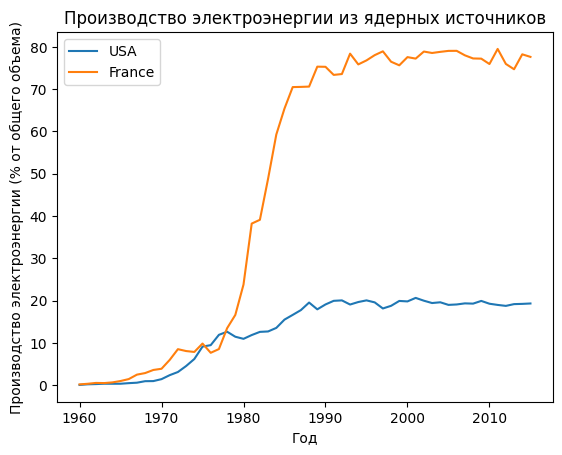

In [6]:
df.plot(x='Year', y=['USA', 'France'], kind='line')
plt.title("Производство электроэнергии из ядерных источников")
plt.xlabel("Год")
plt.ylabel("Производство электроэнергии (% от общего объема)")
plt.show()


Автокорреляционная и частная автокорреляционная функции

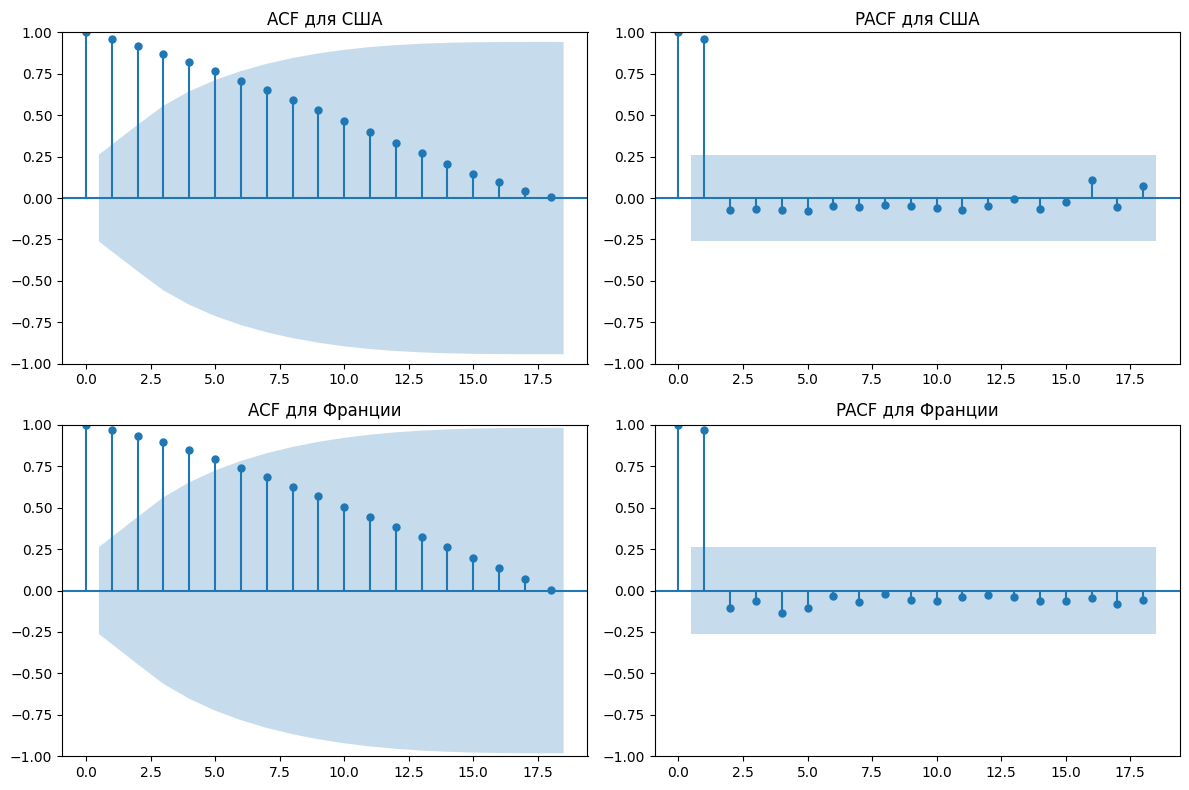

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# ACF для США
plot_acf(df['USA'].values.squeeze(), ax=axes[0, 0], title='ACF для США')

# PACF для США
plot_pacf(df['USA'].values.squeeze(), ax=axes[0, 1], title='PACF для США')

# ACF для Франции
plot_acf(df['France'], ax=axes[1, 0], title='ACF для Франции')

# PACF для Франции
plot_pacf(df['France'], ax=axes[1, 1], title='PACF для Франции')

# Настройка расположения графиков
plt.tight_layout()
plt.show()



## 3.2

In [8]:
from statsmodels.tsa.stattools import kpss

# Для США
kpss_test_usa = kpss(df['USA'])
print('KPSS Statistic: %f' % kpss_test_usa[0])
print('p-value: %f' % kpss_test_usa[1])
print('Critical Values:')
for key, value in kpss_test_usa[3].items():
    print('\t%s: %.3f' % (key, value))

# Для Франции
kpss_test_france = kpss(df['France'])
print('KPSS Statistic: %f' % kpss_test_france[0])
print('p-value: %f' % kpss_test_france[1])
print('Critical Values:')
for key, value in kpss_test_france[3].items():
    print('\t%s: %.3f' % (key, value))


KPSS Statistic: 1.059654
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
KPSS Statistic: 1.072875
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_84178/2736286126.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test_usa = kpss(df['USA'])
/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_84178/2736286126.py:12: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test_france = kpss(df['France'])


## 3.3

In [9]:
y = df['USA']  # Временной ряд ВВП США
n = len(y)
X = np.column_stack([np.ones(n), np.arange(1, n+1)])
beta = np.linalg.inv(X.T @ X) @ X.T @ y
y_fit = X @ beta
residuals = y - y_fit
cumulative_sum = np.cumsum(residuals - np.mean(residuals))

y_france = df['France']  # Временной ряд ВВП Франции
n_france = len(y_france)
X_france = np.column_stack([np.ones(n_france), df['Year']])
beta_france = np.linalg.inv(X_france.T @ X_france) @ X_france.T @ y_france
y_france_fit = X_france @ beta_france
residuals_france = y_france - y_france_fit

cumulative_sum_france = np.cumsum(residuals_france - np.mean(residuals_france))

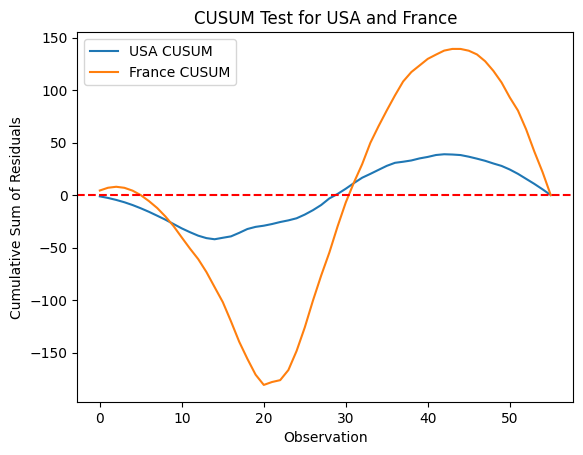

In [10]:
# График ВВП США
plt.plot(cumulative_sum, label='USA CUSUM')

# График ВВП Франции
plt.plot(cumulative_sum_france, label='France CUSUM')

# Добавляем горизонтальную линию на уровне 0 для ориентира
plt.axhline(y=0, color='r', linestyle='--')

# Настраиваем график
plt.title('CUSUM Test for USA and France')
plt.xlabel('Observation')
plt.ylabel('Cumulative Sum of Residuals')
plt.legend()

# Отображаем график
plt.show()


In [11]:
import statsmodels.api as sm
from scipy.stats import f

# Определяем точку разрыва, например, 2008 год
breakpoint = 2008

# Отделяем данные для США до и после кризиса
usa_pre = df[df['Year'] < breakpoint]['USA']
usa_post = df[df['Year'] >= breakpoint]['USA']
years_pre = df[df['Year'] < breakpoint]['Year']
years_post = df[df['Year'] >= breakpoint]['Year']

# Регрессия для всего периода
X_full = sm.add_constant(df['Year'])
y_full = df['USA']
model_full = sm.OLS(y_full, X_full).fit()

# Регрессия для периода до кризиса
X_pre = sm.add_constant(years_pre)
y_pre = usa_pre
model_pre = sm.OLS(y_pre, X_pre).fit()

# Регрессия для периода после кризиса
X_post = sm.add_constant(years_post)
y_post = usa_post
model_post = sm.OLS(y_post, X_post).fit()

# Вычисляем сумму квадратов ошибок для каждой модели
ssr_full = model_full.ssr
ssr_pre = model_pre.ssr
ssr_post = model_post.ssr

# Вычисляем F-статистику для теста Чоу
n = len(y_full)  # Общее количество наблюдений
k = 2  # Количество независимых переменных (включая константу)
F = ((ssr_full - (ssr_pre + ssr_post)) / k) / ((ssr_pre + ssr_post) / (n - 2*k))

# Получаем p-value
p_value = 1 - f.cdf(F, k, n - 2*k)
print("USA F-statistic:", F)
print("USA p-value:", p_value)

# Теперь можно повторить те же шаги для данных по Франции
france_pre = df[df['Year'] < breakpoint]['France']
france_post = df[df['Year'] >= breakpoint]['France']

y_full = df['France']
model_full = sm.OLS(y_full, X_full).fit()
y_pre = france_pre
model_pre = sm.OLS(y_pre, X_pre).fit()
y_post = france_post
model_post = sm.OLS(y_post, X_post).fit()

ssr_full = model_full.ssr
ssr_pre = model_pre.ssr
ssr_post = model_post.ssr
F = ((ssr_full - (ssr_pre + ssr_post)) / k) / ((ssr_pre + ssr_post) / (n - 2*k))
p_value = 1 - f.cdf(F, k, n - 2*k)
print("France F-statistic:", F)
print("France p-value:", p_value)


USA F-statistic: 20.52147647446555
USA p-value: 2.693495878558494e-07
France F-statistic: 15.45135803713725
France p-value: 5.411269885402525e-06


## 4.1

In [12]:
# Функция для проведения теста на стационарность KPSS
def kpss_test(series, name):
    statistic, p_value, _, critical_values = kpss(series)
    print(f'Тест KPSS для {name}:')
    print(f'Статистика теста: {statistic}')
    print(f'p-значение: {p_value}') 
    print('Критические значения:')
    for key, value in critical_values.items():
        print(f'\t{key}: {value}') 
    if p_value < 0.05: 
        print("Результат: Ряд нестационарен")
    else: 
        print("Результат: Ряд стационарен на уровне доверия 95%")

# Функция для проведения расширенного теста Дики-Фуллера
def adf_test(series, name):
    result = adfuller(series)
    print(f'Расширенный тест Дики-Фуллера для {name}:')
    print(f'Статистика теста: {result[0]}')
    print(f'p-значение: {result[1]}')
    print('Критические значения:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    if result[1] < 0.05:
        print("Результат: Ряд стационарен на уровне доверия 95%")
    else:
        print("Результат: Ряд нестационарен")

# Функция для проведения теста Филлипса-Перрона
def pp_test(series, name):
    result_pp = adfuller(series, regression='c')  
    print(f'Тест Филлипса-Перрона для {name}:')
    print(f'Статистика теста: {result_pp[0]}')
    print(f'p-значение: {result_pp[1]}')
    print('Критические значения:')
    for key, value in result_pp[4].items():
        print(f'\t{key}: {value}')
    if result_pp[1] < 0.05:
        print("Результат: Ряд стационарен на уровне доверия 95%")
    else:
        print("Результат: Ряд нестационарен")

# Проведение всех тестов для рядов USA и France
def run_tests(series, name):
    kpss_test(series, name)
    print('\n')
    adf_test(series, name)
    print('\n')
    pp_test(series, name)
    print('\n')
    print('\n')

# Проведение тестов для рядов USA и France
run_tests(df['USA'], 'USA')
run_tests(df['France'], 'France')


Тест KPSS для USA:
Статистика теста: 1.0596536578206779
p-значение: 0.01
Критические значения:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Результат: Ряд нестационарен


Расширенный тест Дики-Фуллера для USA:
Статистика теста: -1.7739076887533565
p-значение: 0.3934905635578662
Критические значения:
	1%: -3.5552728880540942
	5%: -2.9157312396694217
	10%: -2.5956695041322315
Результат: Ряд нестационарен


Тест Филлипса-Перрона для USA:
Статистика теста: -1.7739076887533565
p-значение: 0.3934905635578662
Критические значения:
	1%: -3.5552728880540942
	5%: -2.9157312396694217
	10%: -2.5956695041322315
Результат: Ряд нестационарен




Тест KPSS для France:
Статистика теста: 1.0728748084993596
p-значение: 0.01
Критические значения:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Результат: Ряд нестационарен


Расширенный тест Дики-Фуллера для France:
Статистика теста: -1.68843797100931
p-значение: 0.43707921152587725
Критические значения:
	1%: -3.562878534649522
	5%: -2.918973284023669
	10

/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_84178/3492771817.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, _, critical_values = kpss(series)
/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_84178/3492771817.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, _, critical_values = kpss(series)


In [16]:
# Приведение ряда к стационарному виду путем взятия последовательных разностей
def make_stationary(series):
    # Вычисление разностей
    differenced_series = series.diff().dropna()
    return differenced_series

# Применение функции для рядов USA и France
stationary_usa = make_stationary(df['USA'])
stationary_france = make_stationary(df['France'])

# Вывод первых нескольких строк преобразованных рядов
print("Преобразованный ряд для USA (последовательные разности):")
print(stationary_usa.head())
print("\nПреобразованный ряд для France (последовательные разности):")
print(stationary_france.head())

# Применение метода взятия последовательных разностей еще раз для ряда France
stationary_france_2 = make_stationary(stationary_france)

# Вывод первых нескольких строк преобразованного ряда France (второй раз)
print("\nПреобразованный ряд для France (последовательные разности, второй раз):")
print(stationary_france_2.head())

# Создание DataFrame с преобразованными рядами
stationary_df = pd.concat([stationary_usa, stationary_france_2], axis=1)
stationary_df.columns = ['USA', 'France']  # Переименование столбцов
# Удаляем первую строку, так как она содержит NaN
stationary_df = stationary_df.dropna()
# Вывод первых нескольких строк объединенной таблицы
print("\nОбъединенная таблица с преобразованными рядами:")
print(stationary_df.head())


Преобразованный ряд для USA (последовательные разности):
1    0.145902
2    0.053504
3    0.085049
4   -0.010472
5    0.006703
Name: USA, dtype: float64

Преобразованный ряд для France (последовательные разности):
1    0.144728
2    0.203476
3   -0.037623
4    0.158257
5    0.328940
Name: France, dtype: float64

Преобразованный ряд для France (последовательные разности, второй раз):
2    0.058747
3   -0.241099
4    0.195880
5    0.170683
6    0.128057
Name: France, dtype: float64

Объединенная таблица с преобразованными рядами:
        USA    France
2  0.053504  0.058747
3  0.085049 -0.241099
4 -0.010472  0.195880
5  0.006703  0.170683
6  0.137385  0.128057


In [17]:
# Проведение тестов для рядов USA и France
run_tests(stationary_df['USA'], 'USA')
run_tests(stationary_df['France'], 'France')


Тест KPSS для USA:
Статистика теста: 0.4358826398942862
p-значение: 0.061688517286945604
Критические значения:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Результат: Ряд стационарен на уровне доверия 95%


Расширенный тест Дики-Фуллера для USA:
Статистика теста: -5.756970885837682
p-значение: 5.789532100862092e-07
Критические значения:
	1%: -3.560242358792829
	5%: -2.9178502070837
	10%: -2.5967964150943397
Результат: Ряд стационарен на уровне доверия 95%


Тест Филлипса-Перрона для USA:
Статистика теста: -5.756970885837682
p-значение: 5.789532100862092e-07
Критические значения:
	1%: -3.560242358792829
	5%: -2.9178502070837
	10%: -2.5967964150943397
Результат: Ряд стационарен на уровне доверия 95%




Тест KPSS для France:
Статистика теста: 0.15589313713398065
p-значение: 0.1
Критические значения:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
Результат: Ряд стационарен на уровне доверия 95%


Расширенный тест Дики-Фуллера для France:
Статистика теста: -10.429188789825352
p-значение:

/var/folders/83/4cpt7wtj7klgynj87_19cbgw0000gn/T/ipykernel_84178/3492771817.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  statistic, p_value, _, critical_values = kpss(series)


## 4.2